# CSCI Final Project

Group members:


1.   Brynx Alegarbes
2.   Michael Deekimcheng
3.   Ellyn Lee
4.   Harvey Felipe
5.   Jeremy Tan



# CRISP-DM
CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is a widely used process model for data mining and machine learning projects. 

It consists of six phases:

1.   Business Understanding - Set Problem Statement and Objectives, Formulate Research Questions
2.   Data Understanding - Collecting and Describing the Data, Finding Key Attributes, Checking Data Quality
3.   Data Preparation - Cleaning, Transforming, and Selecting key features
4.   Modeling - Implementing the appropriate modeling technique, setting key parameter values
5.   Evaluation - Evaluate model's performance using testing set
6.   Deployment - Summarize results and create a report



# Business Understanding

## Problem Statement:
A company wants to identify the most important factors which lead to employee attrition and predict which of their current employees are more likely to leave the company. Employee attrition is defined as the process of employees leaving an organization over a period of time, either voluntarily or involuntarily. A high attrition rate can signify poor productivity and morale among the employees of the company. Currently, the company has data on current and past employees. The dataset contains information on the company's employees such as their age, monthly income, work life balance, and performance rating. The main data mining objective is to create a predictive model for employee attrition. 

## Business Objective:
The main business objective is to identify and predict which of the current employees in the company are likely to leave the company based on their characteristics. Moreover, the company wants to reduce its long-term attrition rate by using the predictive model when hiring new employees, who are less likely to leave the company.

## Data Mining Objectives:
- Identifying the factors that contribute to employee attrition 

- Developing a predictive model that can accurately predict which employees are most likely to leave the company.

- Evaluating the performance of the model using appropriate metrics like accuracy, precision, and F1 score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Understanding - Describe the Data
In this phase: 
- We check the distribution of the target attribute, attrition.
- Check for missing values
- We explore the relationships between pairs of attributes.
- We do simple aggregations to find properties of sub-classes or groups.

In [ ]:
# Loading the Data
data = pd.read_csv("Workforce-Sustainability-Dataset-df.csv")
# Viewing the Data
print(f"Our data has {data.shape[0]} rows and {data.shape[1]} columns.")
data.head()

Our data has 1470 rows and 35 columns.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Accounting,1,1,2,Female,94,3,2,Wealth Manager,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Banking Operations,8,1,Accounting,1,2,3,Male,61,2,2,Loans Officer,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Banking Operations,2,2,Other,1,4,4,Male,92,2,1,Bank Teller,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Banking Operations,3,4,Accounting,1,5,4,Female,56,3,1,Loans Officer,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Banking Operations,2,1,Finance,1,7,1,Male,40,3,1,Bank Teller,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# We get the distribution of our target variable, attrition
attrition_values = data["Attrition"].value_counts()
attrition_values

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
print(f"This means that around {round((attrition_values[1]/attrition_values[0])*100, 2)}% of the employees in the dataset have left the company.")

This means that around 19.22% of the employees in the dataset have left the company.


# Summary of the numerical values in the dataset

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Observations**:
- The values of EmployeeNumber are unique to each employee and can be made the index of the dataframe.
- The attributes: EmployeeCount, StandardHours have the same value for all employees, and thus can be removed from the dataset.
- For the categorical data, Over18 has the same value, "Y" for all employees so it can also be removed.


In [ ]:
# Changing the index of the dataframe
data = data.rename(data["EmployeeNumber"], axis = 0)
# Removing unneccessary columns
data.drop(["EmployeeNumber","EmployeeCount","StandardHours", "Over18"], inplace = True, axis = 1)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Accounting,2,Female,94,3,2,Wealth Manager,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Banking Operations,8,1,Accounting,3,Male,61,2,2,Loans Officer,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Banking Operations,2,2,Other,4,Male,92,2,1,Bank Teller,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Banking Operations,3,4,Accounting,4,Female,56,3,1,Loans Officer,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Banking Operations,2,1,Finance,1,Male,40,3,1,Bank Teller,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Numerical Variables
numerical_cols = data.select_dtypes(include='number').columns.tolist()
print(numerical_cols, "\n")
print(f"Number of numerical columns: {len(numerical_cols)} \n")

# Categorical Variables
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print(categorical_cols, "\n")
print(f"Number of categorical columns: {len(categorical_cols)} \n")

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Number of numerical columns: 23 

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] 

Number of categorical columns: 8 



# Descriptive Data:
## Pie Chart
representing distributions of employee attrition based on 

1. Job Level 
2. Department 
3. Environment Satisfaction
4. Job Satisfaction
5. Relationship Satisfaction
6. Gender 
7. Education Level
8. Education Field





In [ ]:
# Subset the employees who have left the company
attrition_yes = data[data["Attrition"]== "Yes"]

1    143
2     52
3     32
5      5
4      5
Name: JobLevel, dtype: int64


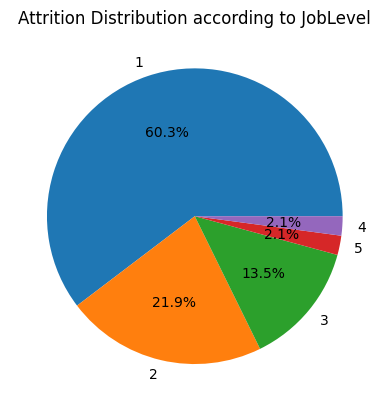

Banking Operations    133
Sales                  92
Human Resources        12
Name: Department, dtype: int64


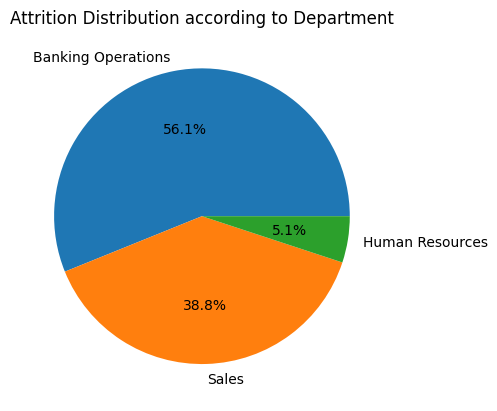

1    72
3    62
4    60
2    43
Name: EnvironmentSatisfaction, dtype: int64


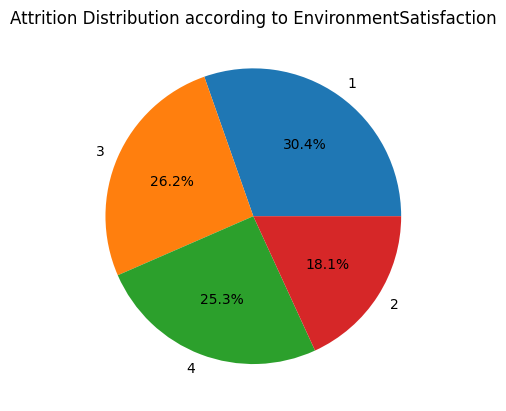

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64


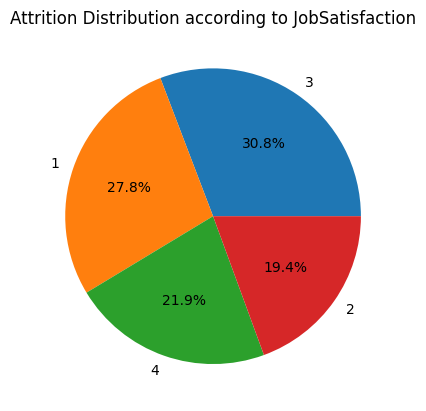

3    71
4    64
1    57
2    45
Name: RelationshipSatisfaction, dtype: int64


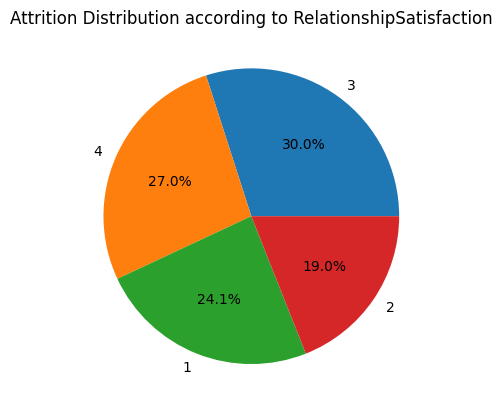

Male      150
Female     87
Name: Gender, dtype: int64


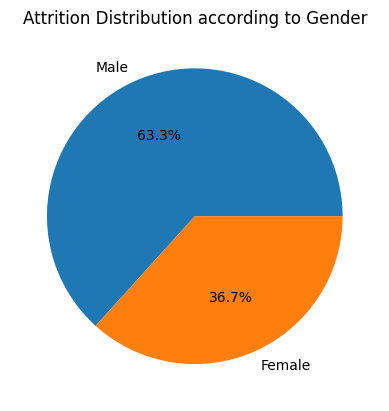

3    99
4    58
2    44
1    31
5     5
Name: Education, dtype: int64


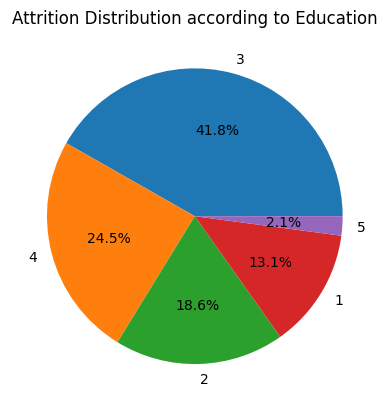

Accounting          89
Finance             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64


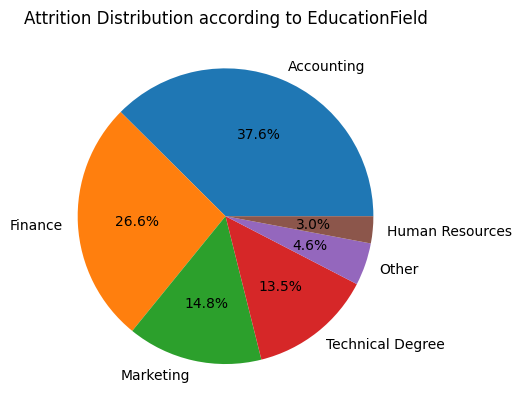

In [ ]:
# Job Level
cols = ["JobLevel", "Department", "EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction", "Gender", "Education", "EducationField"]

for col in cols:
  attrition = attrition_yes[col].value_counts()
  print(attrition)
  plt.pie(attrition, labels=attrition.index, autopct='%1.1f%%')
  cmap = plt.get_cmap('Pastel1')
  plt.set_cmap(cmap)
  plt.title(f"Attrition Distribution according to {col}")
  plt.show()


Line Charts

Comparing the trends between the frequency of attribution and the ff:

1. Total Working Year
2. Percent Salary Hike
3. Years at Company

In [ ]:
foo = data[data['Attrition']=='Yes']

Text(0, 0.5, 'Count of Attrition')

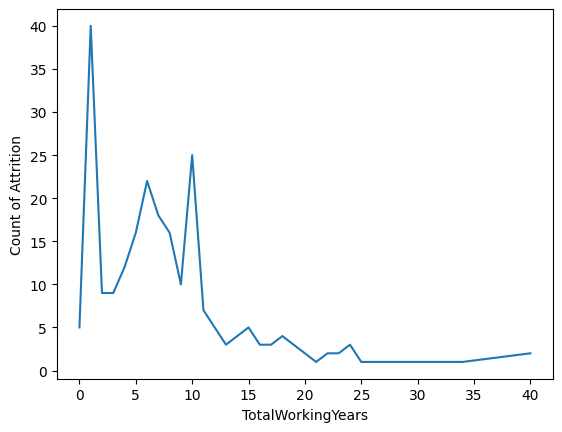

In [ ]:
foo.groupby('TotalWorkingYears')['Attrition'].count().plot.line().set_ylabel('Count of Attrition')

Text(0, 0.5, 'Count of Attrition')

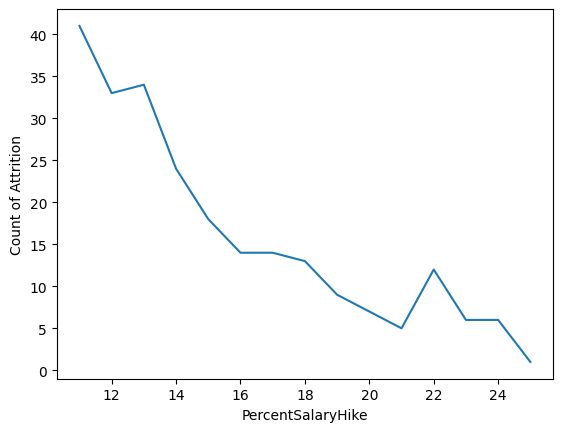

In [ ]:
foo.groupby('PercentSalaryHike')['Attrition'].count().plot.line().set_ylabel('Count of Attrition')

Text(0, 0.5, 'Count of Attrition')

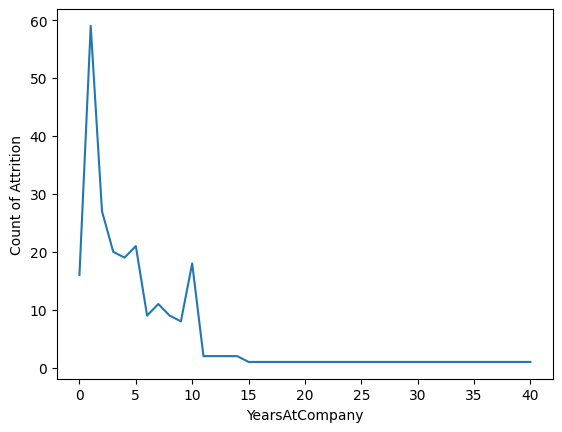

In [ ]:
foo.groupby('YearsAtCompany')['Attrition'].count().plot.line().set_ylabel('Count of Attrition')

## Bar Graph
displaying the attrition percentage for

1. Job Level 
2. Department 
3. Environment Satisfaction
4. Job Satisfaction
5. Relationship Satisfaction
6. Gender 
7. Education Level
8. Education Field





1    26.335175
2     9.737828
3    14.678899
4     4.716981
5     7.246377
Name: JobLevel, dtype: float64


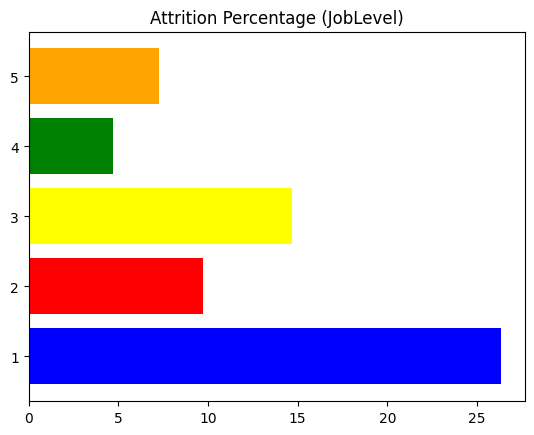

Banking Operations    13.839750
Sales                 20.627803
Human Resources       19.047619
Name: Department, dtype: float64


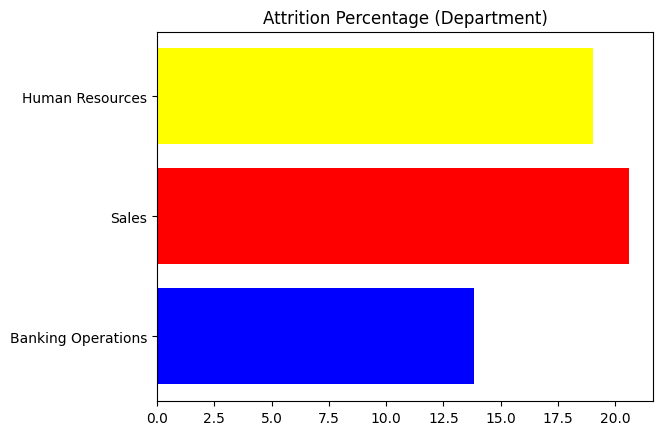

1    25.352113
2    14.982578
3    13.686534
4    13.452915
Name: EnvironmentSatisfaction, dtype: float64


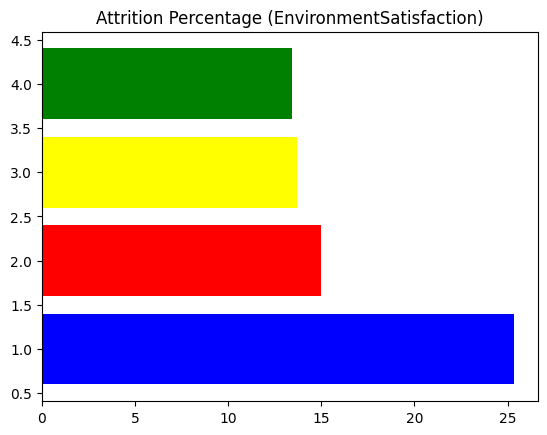

1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: JobSatisfaction, dtype: float64


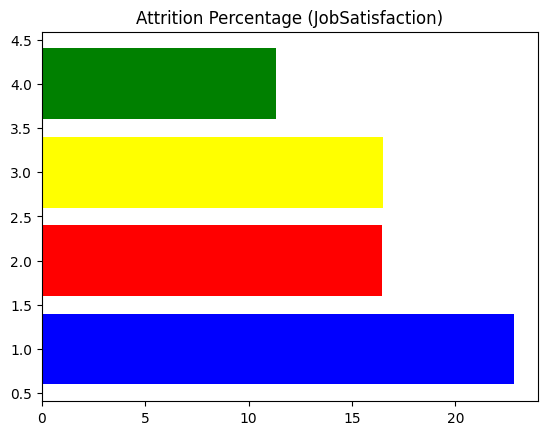

1    20.652174
2    14.851485
3    15.468410
4    14.814815
Name: RelationshipSatisfaction, dtype: float64


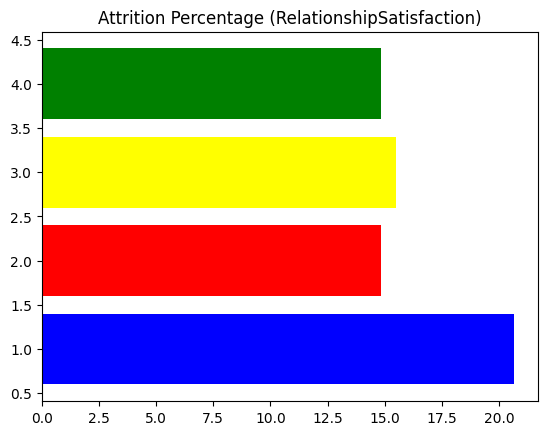

Male      17.006803
Female    14.795918
Name: Gender, dtype: float64


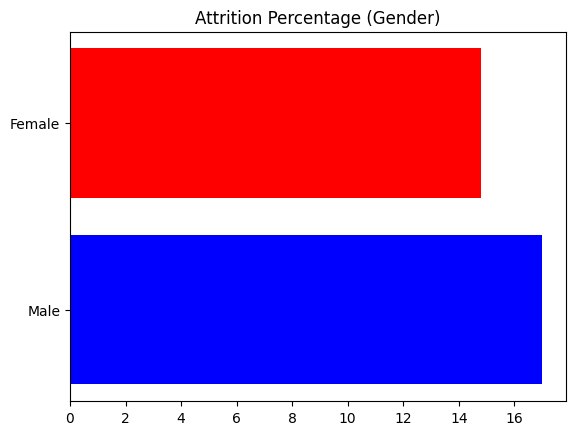

3    17.307692
4    14.572864
2    15.602837
1    18.235294
5    10.416667
Name: Education, dtype: float64


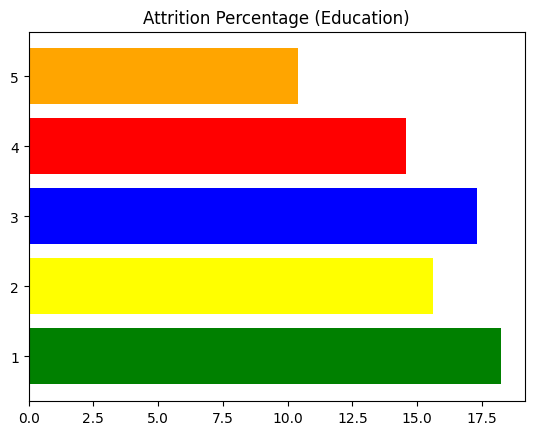

Accounting          14.686469
Finance             13.577586
Marketing           22.012579
Technical Degree    24.242424
Other               13.414634
Human Resources     25.925926
Name: EducationField, dtype: float64


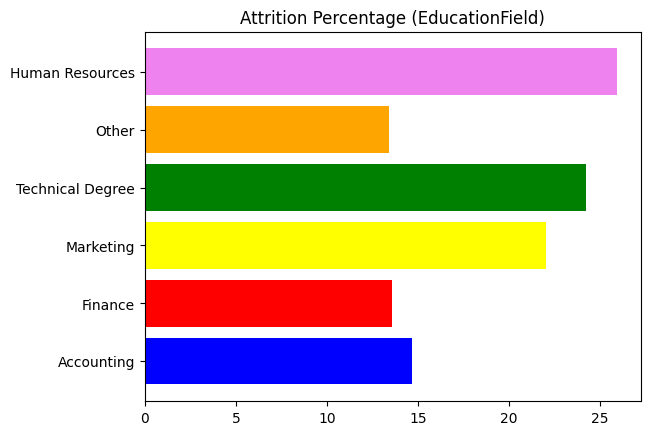

In [ ]:
for col in cols:
  attrition = attrition_yes[col].value_counts()
  total = data[col].value_counts()
  percentages = (attrition/total)*100
  print(percentages)
  plt.barh(percentages.index, percentages, color = ["blue", "red", "yellow", "green", "orange", "violet"]) 
  plt.title(f"Attrition Percentage ({col})")
  plt.show()

# Data Preparation 









In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Accounting,2,Female,94,3,2,Wealth Manager,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Banking Operations,8,1,Accounting,3,Male,61,2,2,Loans Officer,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Banking Operations,2,2,Other,4,Male,92,2,1,Bank Teller,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Banking Operations,3,4,Accounting,4,Female,56,3,1,Loans Officer,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Banking Operations,2,1,Finance,1,Male,40,3,1,Bank Teller,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Creating a variable for the attrition column
attrition_col = data["Attrition"]
attrition_col = attrition_col.eq('Yes').mul(1)
data.drop([ "Attrition"], inplace = True, axis = 1)

# Normalizing the Data
#categorical
cat_df = pd.DataFrame(data, columns=data.columns[(data.dtypes == 'object') | (data.dtypes == 'category')])
cat_df = pd.get_dummies(cat_df, dtype = int)
#continuous
cont_df = pd.DataFrame(data, columns = data.columns[(data.dtypes == 'int64')])
normalized_df = (cont_df-cont_df.min())/(cont_df.max()-cont_df.min()) # Minimax normalization
processed_data = pd.concat([normalized_df,cat_df],axis=1)

In [ ]:
# Inserting the Attrition column

processed_data.insert(0, "Attrition", attrition_col)
cat_df.insert(0, "Attrition", attrition_col)
normalized_df.insert(0, "Attrition", attrition_col)

In [ ]:
processed_data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Banking Operations,Department_Human Resources,Department_Sales,EducationField_Accounting,EducationField_Finance,EducationField_Human Resources,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Bank Manager,JobRole_Bank Specialist,JobRole_Bank Strategist,JobRole_Bank Teller,JobRole_Client Executive,JobRole_HR Manager,JobRole_Human Resources,JobRole_Inside Sales Rep,JobRole_Loans Officer,JobRole_Loans Supervisor,JobRole_Wealth Manager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
5,0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
7,0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


# Overlapping Histograms

In [ ]:
retention = processed_data[processed_data["Attrition"] == 0] # employees retained
attrition = processed_data[processed_data["Attrition"] == 1] # employees who left

Age


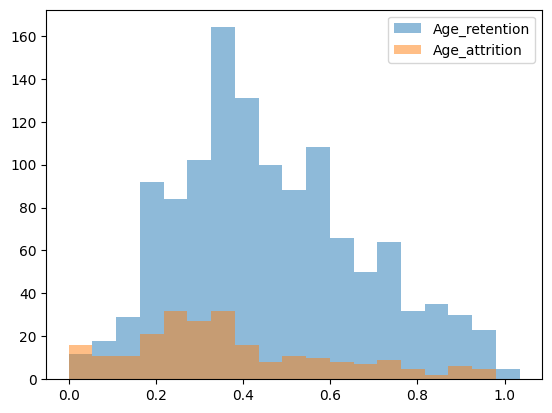

DailyRate


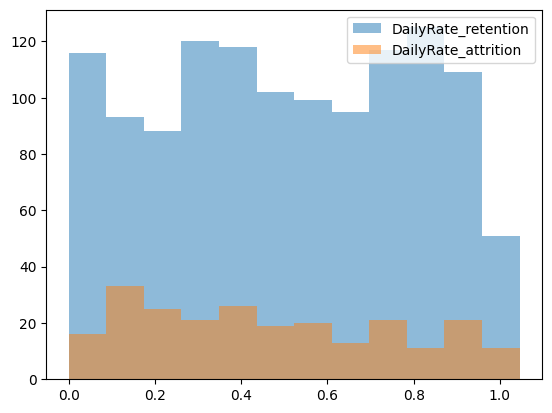

DistanceFromHome


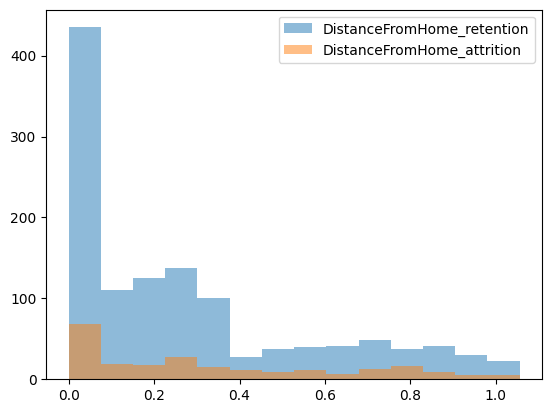

Education


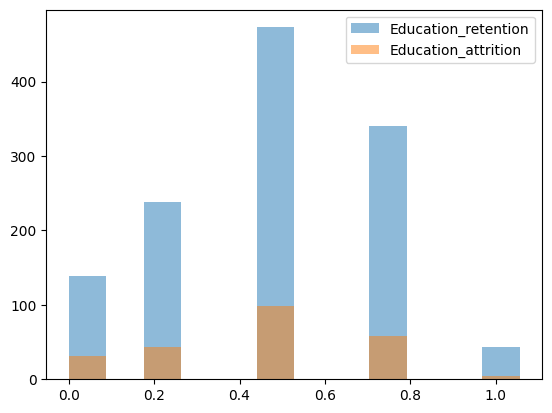

EnvironmentSatisfaction


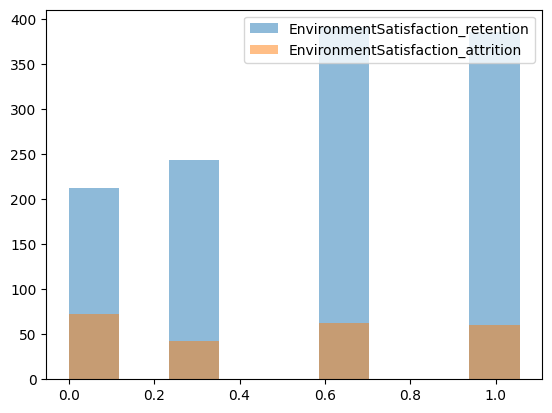

HourlyRate


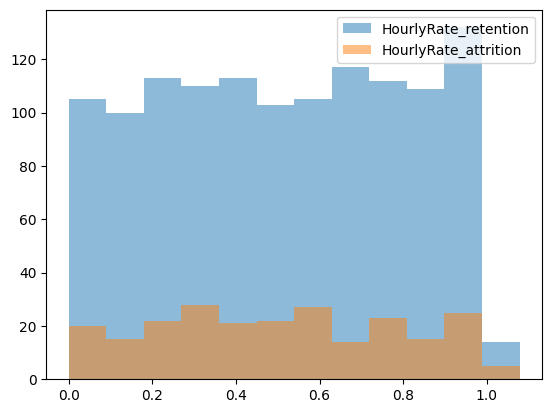

JobInvolvement


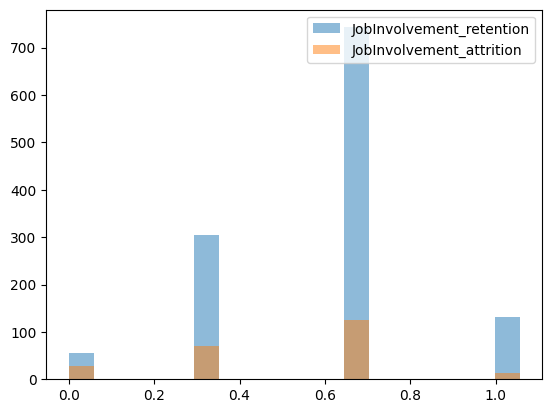

JobLevel


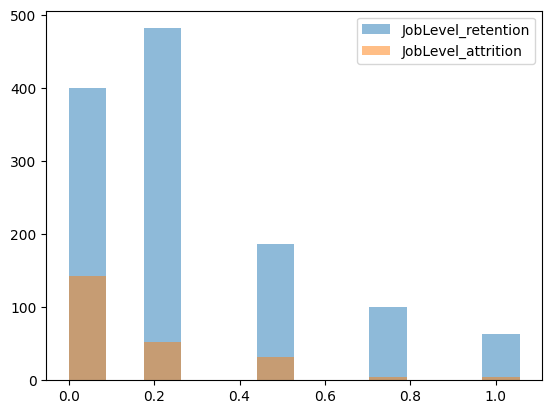

JobSatisfaction


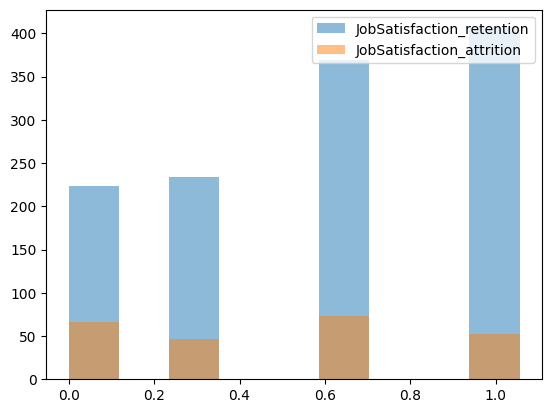

MonthlyIncome


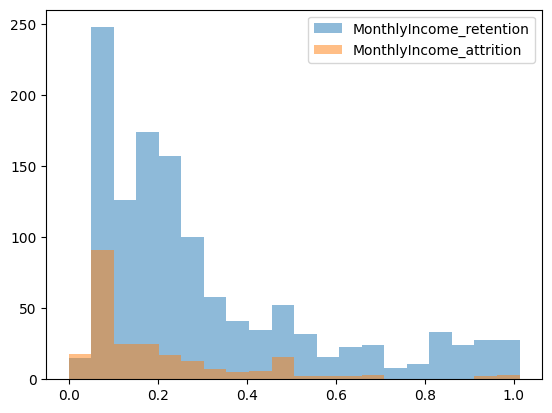

MonthlyRate


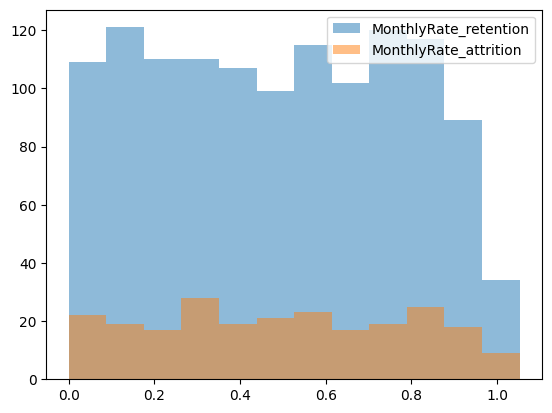

NumCompaniesWorked


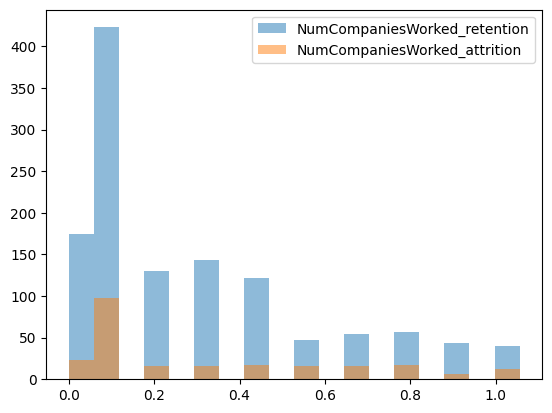

PercentSalaryHike


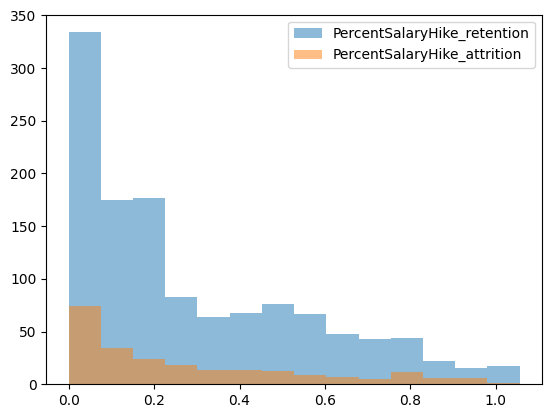

PerformanceRating


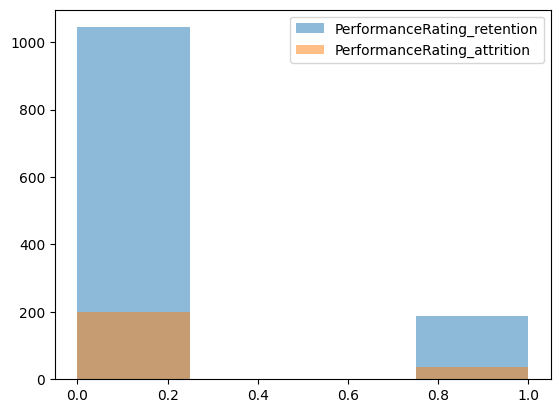

RelationshipSatisfaction


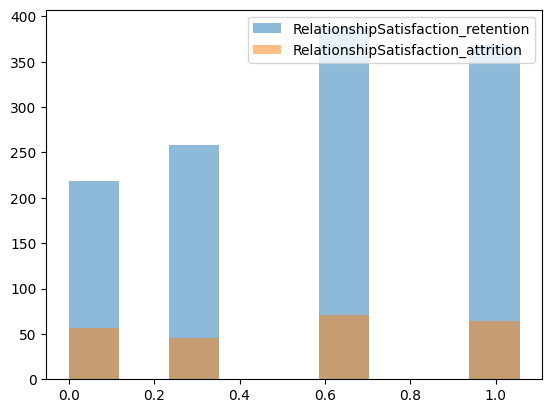

StockOptionLevel


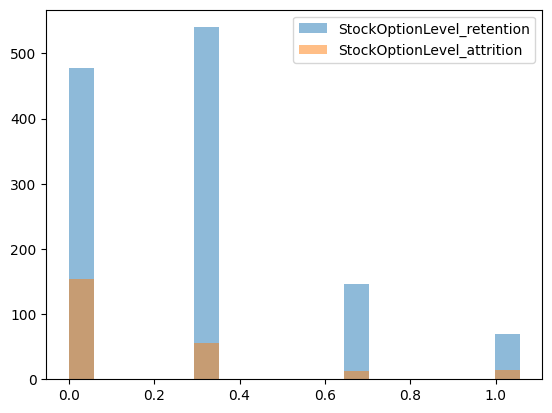

TotalWorkingYears


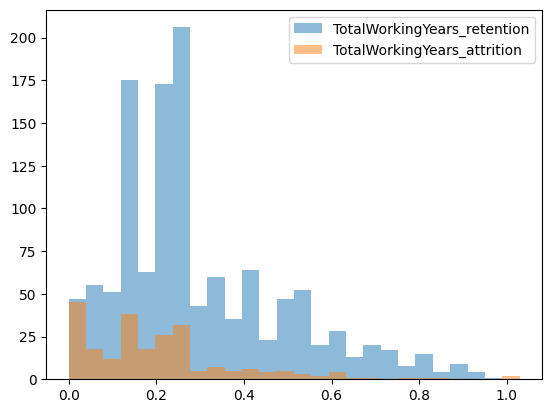

TrainingTimesLastYear


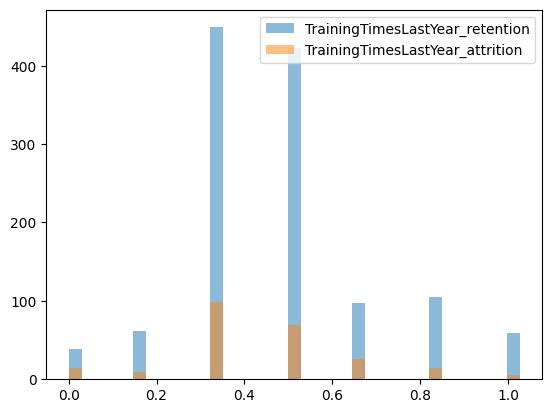

WorkLifeBalance


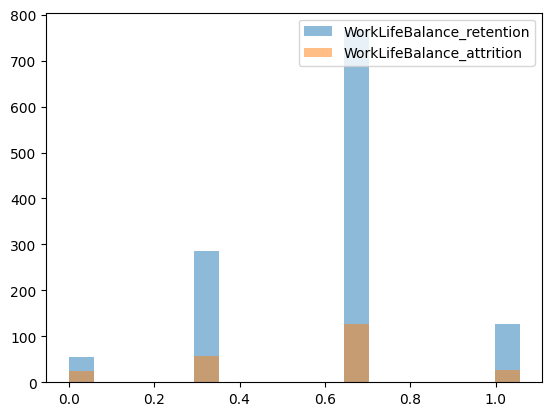

YearsAtCompany


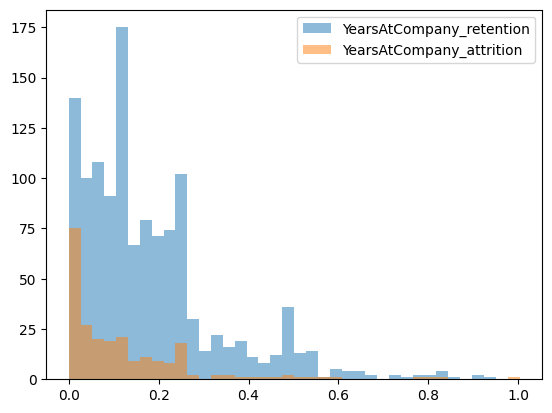

YearsInCurrentRole


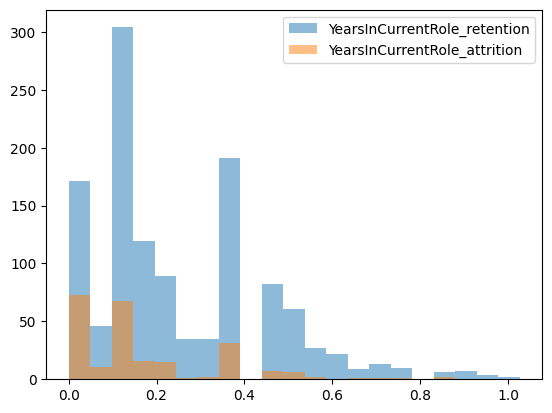

YearsSinceLastPromotion


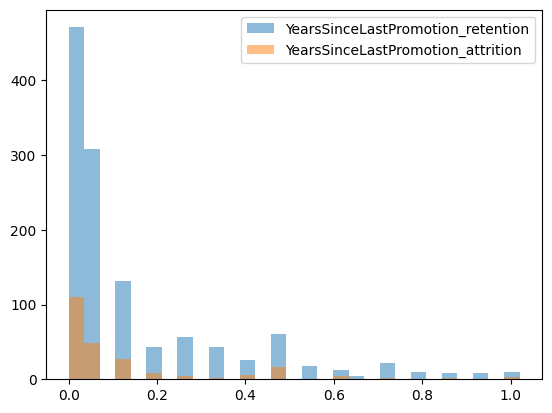

YearsWithCurrManager


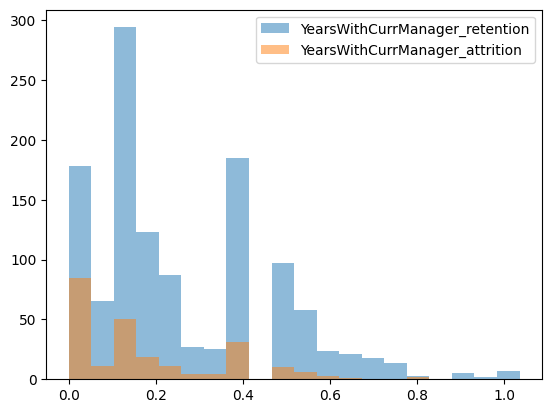

BusinessTravel_Non-Travel


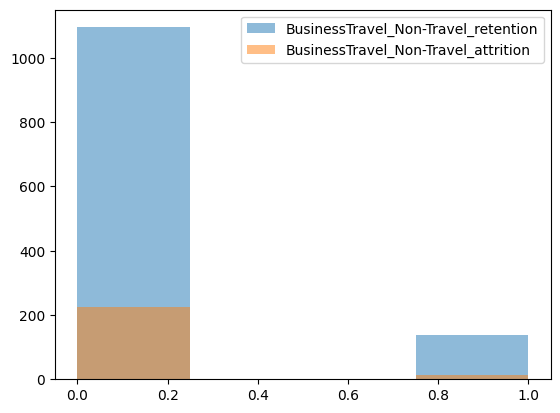

BusinessTravel_Travel_Frequently


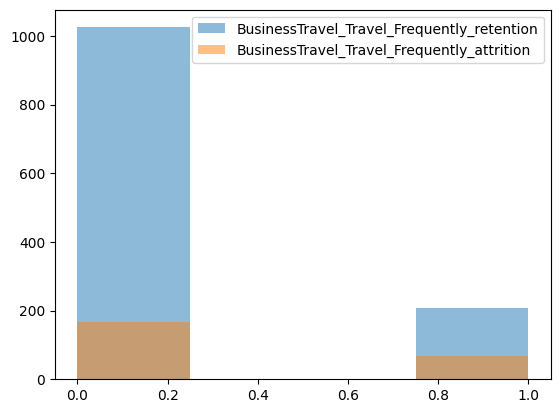

BusinessTravel_Travel_Rarely


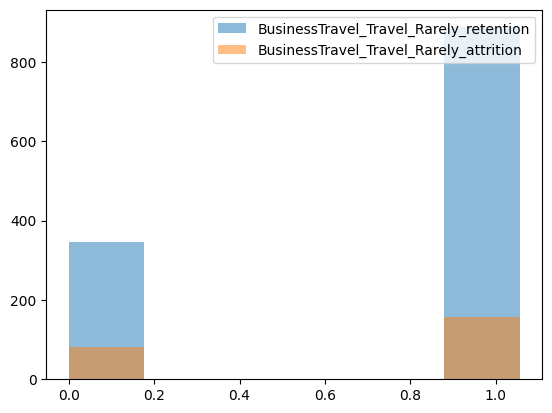

Department_Banking Operations


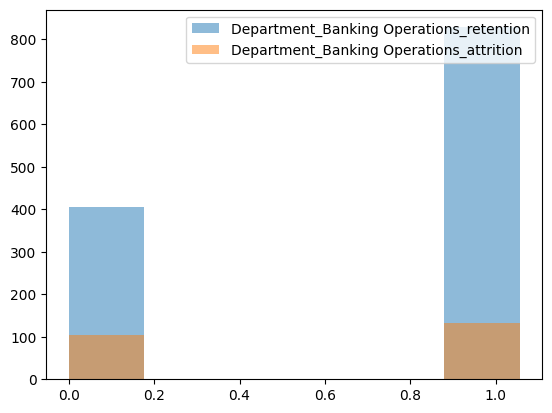

Department_Human Resources


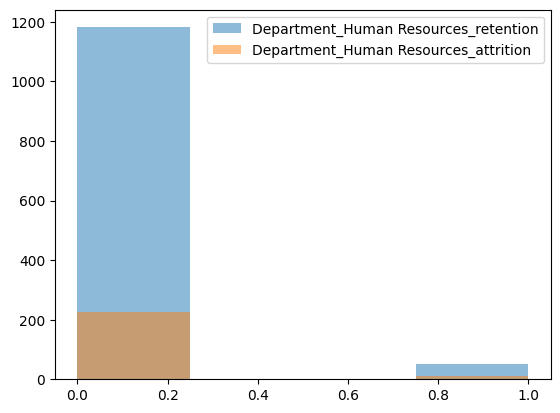

Department_Sales


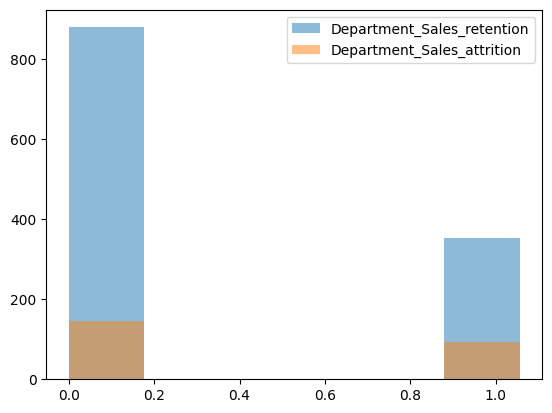

EducationField_Accounting


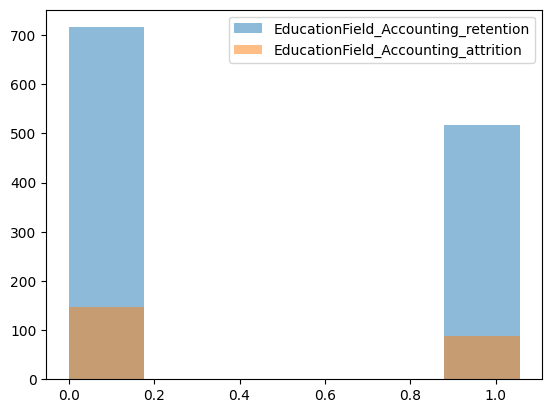

EducationField_Finance


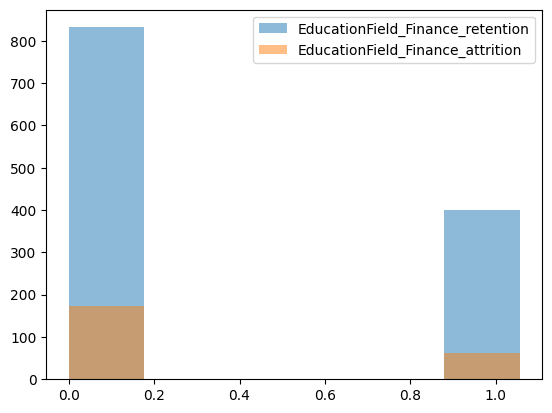

EducationField_Human Resources


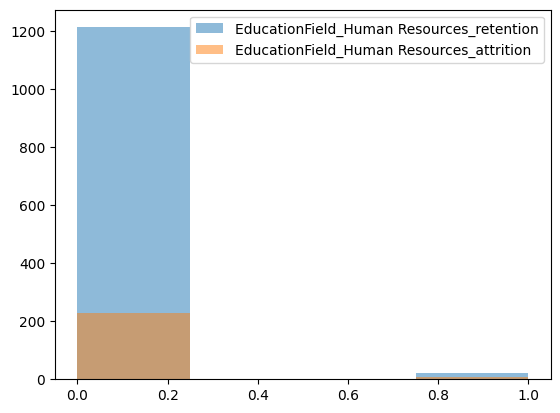

EducationField_Marketing


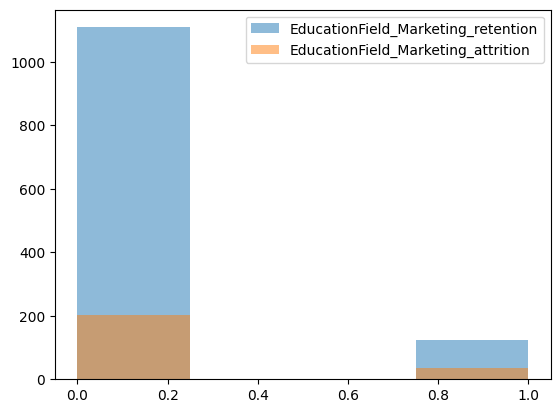

EducationField_Other


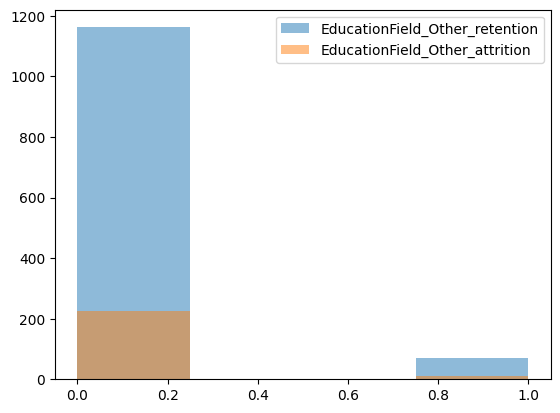

EducationField_Technical Degree


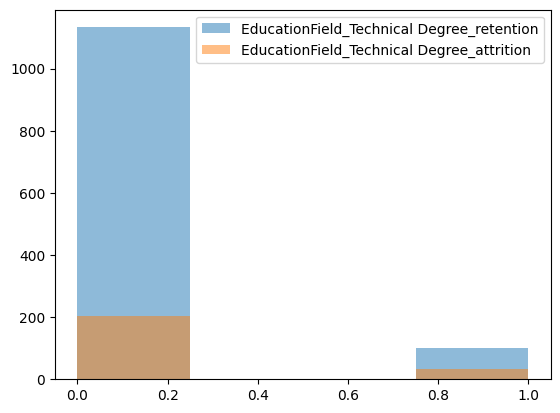

Gender_Female


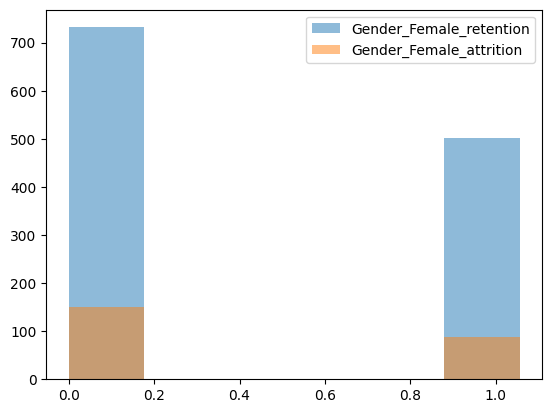

Gender_Male


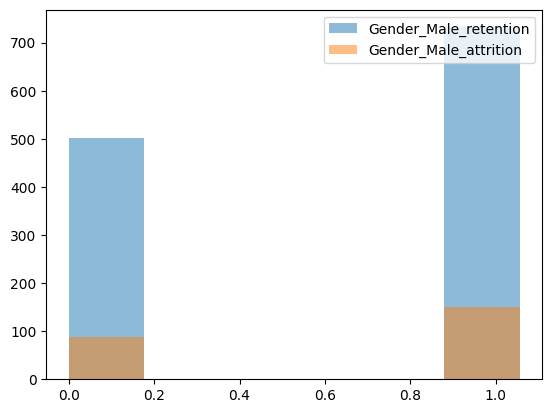

JobRole_Bank Manager


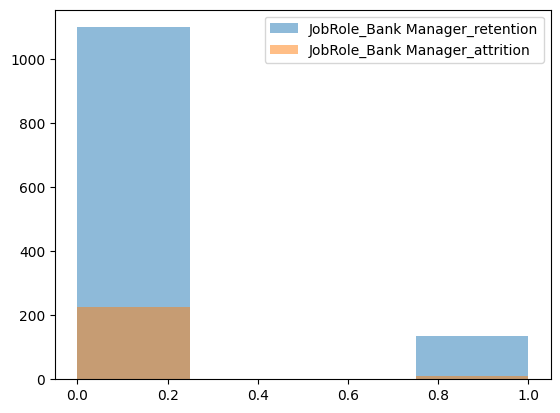

JobRole_Bank Specialist


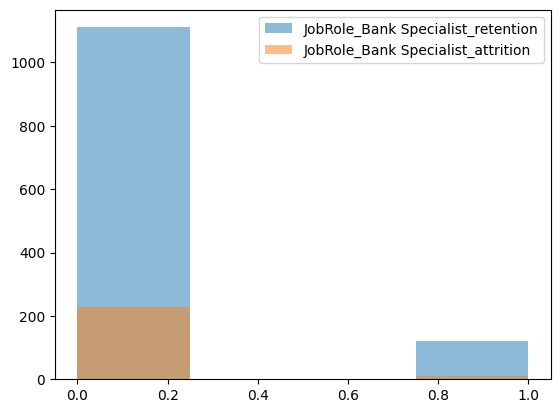

JobRole_Bank Strategist


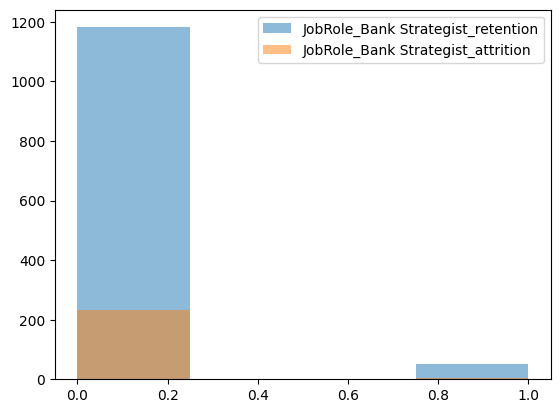

JobRole_Bank Teller


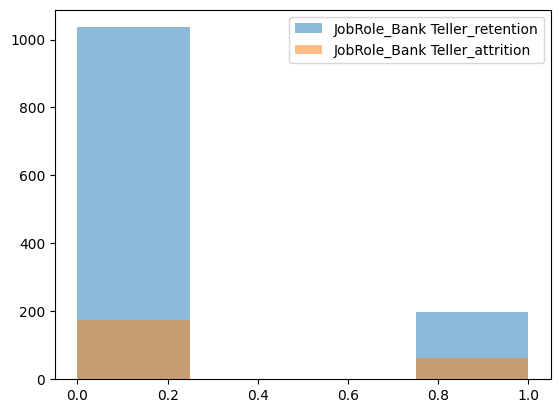

JobRole_Client Executive


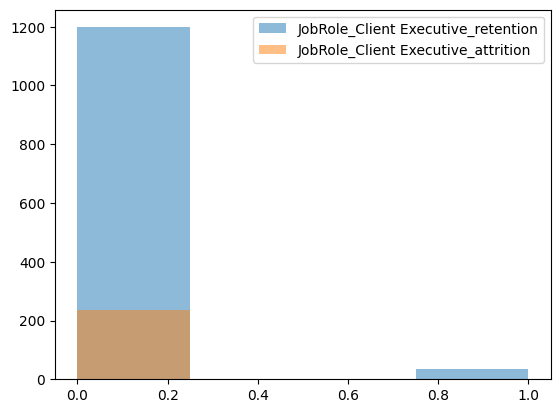

JobRole_HR Manager


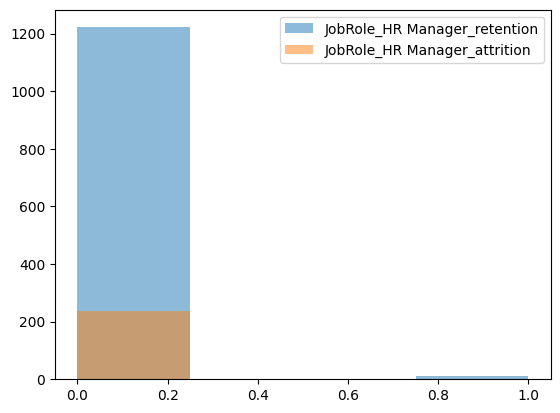

JobRole_Human Resources


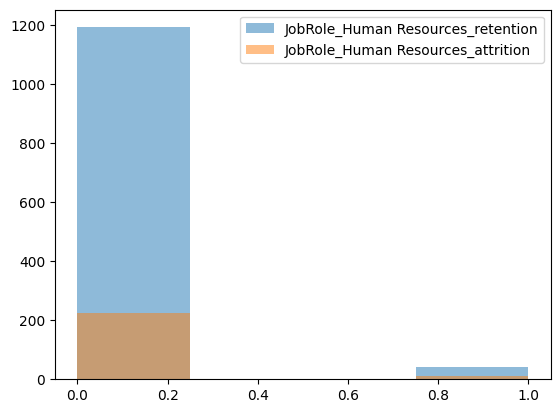

JobRole_Inside Sales Rep


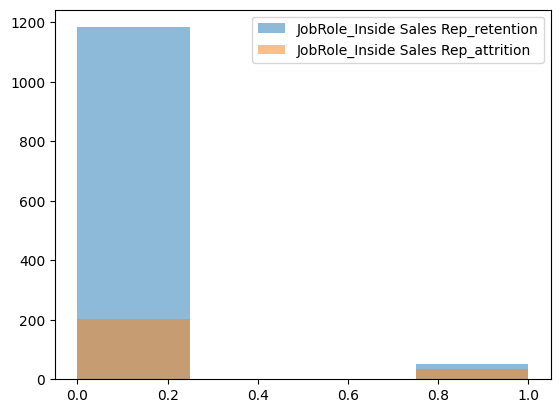

JobRole_Loans Officer


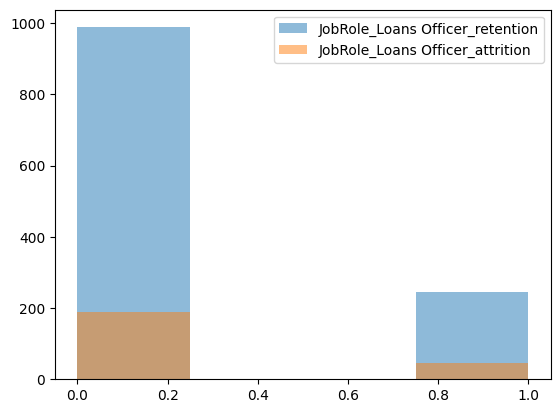

JobRole_Loans Supervisor


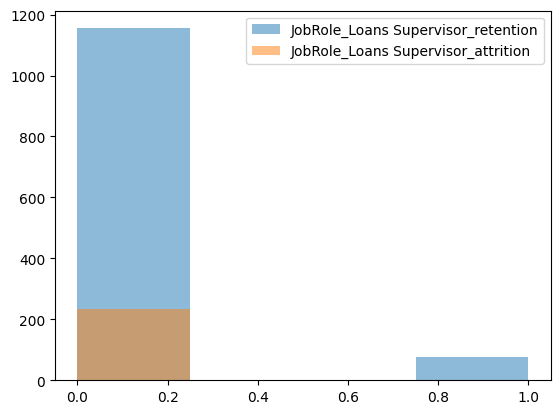

JobRole_Wealth Manager


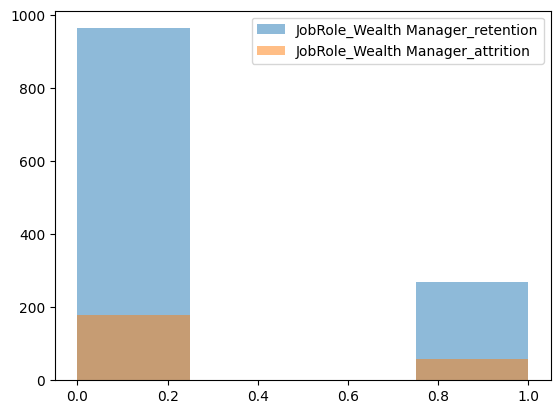

MaritalStatus_Divorced


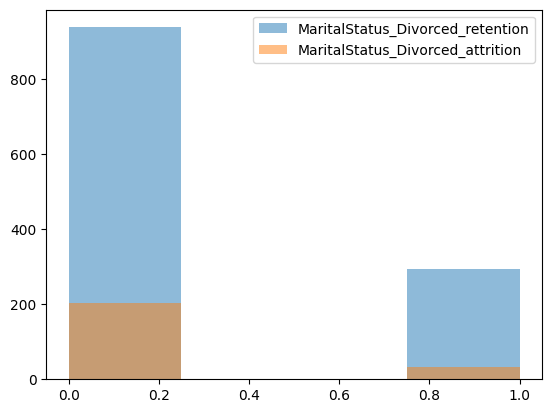

MaritalStatus_Married


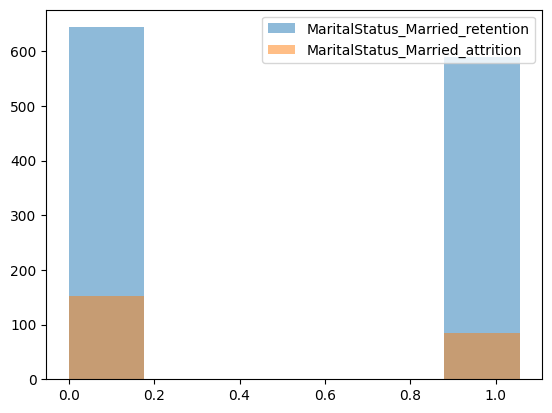

MaritalStatus_Single


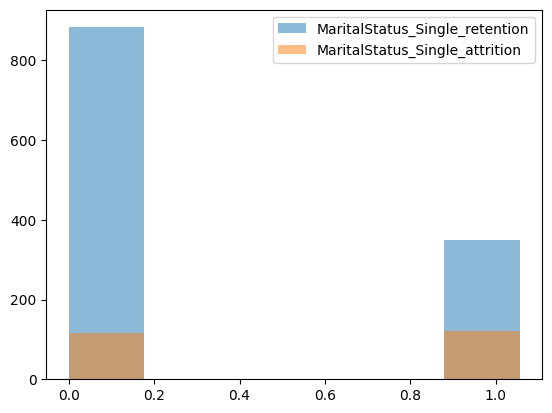

OverTime_No


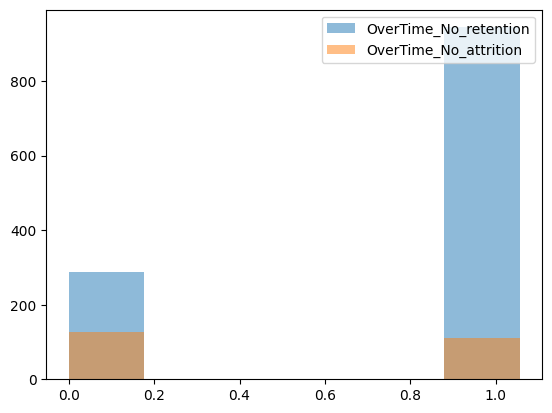

OverTime_Yes


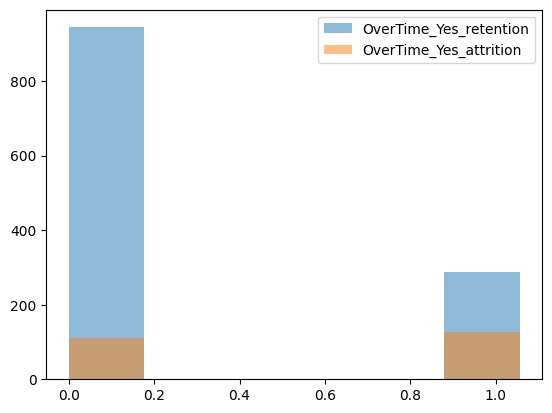

In [ ]:
def binwidth(data):
  '''Given a certain pandas Series or array of numerical data, identify the IQR, and return the bin_width given by the Freedman - Diaconis Rule'''
  q1, q3 = np.percentile(data, [25,75]) ## identify 25th and 75th quartiles
  iqr = q3 - q1 ## calculating for iqr
  n = len(data) ## identify number of rows
  bin_width = (2*iqr)/n**(1/3) ## The Freedman - Diaconis Rule is rounded by default math rounding rules
  return bin_width ## return bin_width

for column in processed_data.columns[1:]: 
  print(column)
  retention2 = retention.loc[:, column] 
  attrition2 = attrition.loc[:, column] 

  if binwidth(processed_data[column]) != 0: # remove 
    bins = np.arange(min(processed_data[column]), max(processed_data[column]) + binwidth(processed_data[column]), binwidth(processed_data[column]))

    plt.hist(retention2, alpha = 0.5, bins=bins, label = f"{column}_retention") 
    plt.hist(attrition2, alpha = 0.5, bins=bins, label = f"{column}_attrition") 
    plt.legend(loc = "upper right") ## Adding necessary Legend
    plt.show() ## Show Plot
  else:
    bins = np.array([0, 0.25, 0.50, 0.75, 1])
    plt.hist(retention2, alpha = 0.5, bins=bins, label = f"{column}_retention") 
    plt.hist(attrition2, alpha = 0.5, bins=bins, label = f"{column}_attrition") 
    plt.legend(loc = "upper right") ## Adding necessary Legend
    plt.show() ## Show Plot


In [ ]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

intersection_scores = {}

for column in processed_data.columns[1:]: ## looping over every numerical column from the normalized data table
  retention2 = retention.loc[:, column] ## obtaining all columns that are labeled "M"
  attrition2 = attrition.loc[:, column] ## obtaining all columns that are labeled "B"

  if binwidth(processed_data[column]) != 0: 
    bins = np.arange(min(processed_data[column]), max(processed_data[column]) + binwidth(processed_data[column]), binwidth(processed_data[column]))
  else:
    bins = np.array([0,0.25,0.50,0.75,1.0])
  
  foo1, bin = np.histogram(retention2, bins = bins)
  foo2, _ = np.histogram(attrition2, bins = bins)

  intersection_scores.update({column:histogram_intersection(foo1,foo2,bin)})
  
sorted(intersection_scores.items(), key=lambda kv: kv[1])


[('YearsAtCompany', 6.226741158652693),
 ('TrainingTimesLastYear', 6.94791739454185),
 ('YearsSinceLastPromotion', 8.337500873450225),
 ('TotalWorkingYears', 9.300534993326593),
 ('YearsInCurrentRole', 11.579862324236416),
 ('MonthlyIncome', 11.851599017904208),
 ('YearsWithCurrManager', 12.261030696250321),
 ('Age', 12.685498365320838),
 ('JobInvolvement', 13.895834789083688),
 ('WorkLifeBalance', 13.895834789083688),
 ('StockOptionLevel', 13.895834789083699),
 ('NumCompaniesWorked', 13.8958347890837),
 ('PercentSalaryHike', 17.866073300250473),
 ('DistanceFromHome', 17.866073300250477),
 ('DailyRate', 20.649787417421454),
 ('MonthlyRate', 20.78014547148118),
 ('JobLevel', 20.843752183625554),
 ('Education', 20.843752183625558),
 ('HourlyRate', 21.290404016131816),
 ('EnvironmentSatisfaction', 27.791669578167408),
 ('JobSatisfaction', 27.791669578167408),
 ('RelationshipSatisfaction', 27.791669578167408),
 ('EducationField_Finance', 41.68750436725111),
 ('Department_Sales', 41.6875043

# Scatterplot Matrix

In [ ]:
processed_data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Banking Operations,Department_Human Resources,Department_Sales,EducationField_Accounting,EducationField_Finance,EducationField_Human Resources,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Bank Manager,JobRole_Bank Specialist,JobRole_Bank Strategist,JobRole_Bank Teller,JobRole_Client Executive,JobRole_HR Manager,JobRole_Human Resources,JobRole_Inside Sales Rep,JobRole_Loans Officer,JobRole_Loans Supervisor,JobRole_Wealth Manager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
5,0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
7,0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
fig, axs = plt.subplots(53,53) ## Identifying paramaters for the scatterplot matrix
fig.suptitle('Scatterplot Matrix', fontsize = 50) ## Setting matrix title
for x in range(53):
    for y in range(53): ## looping over every combination of features
        LabelL = processed_data.loc[processed_data["Attrition"] == 1] ## left
        LabelR = processed_data.loc[processed_data["Attrition"] == 0] ## retain
        LabelL_a = LabelL.iloc[:, x+1] 
        LabelL_b = LabelL.iloc[:, y+1]
        LabelR_a = LabelL.iloc[:, y+1]
        LabelR_b = LabelL.iloc[:, y+1]
        axs[x,y].scatter(x = LabelL_a, y = LabelL_b, s = 0.1, color = "blue", label = "Label L") ## For each box create a scatterplot between M and B
        axs[x,y].scatter(x = LabelR_a, y = LabelR_b, s = 0.1, color = "red", label = "Label R")
for ax in fig.get_axes():
    ax.label_outer()
handles, labels = ax.get_legend_handles_labels() 
fig.legend(handles, labels, loc='upper right', fontsize = "x-large") ## Adding appropriate labels
fig.set_size_inches(15.5, 15.5) ## Changing UI settings
fig.set_dpi(100)
plt.savefig("image.png") ## Save plot
plt.show() ## Show plot

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5c7b824280> (for post_execute):


KeyboardInterrupt: ignored

The ten features with the lowest area of histogram overlap are YearsAtCompany, TrainingTimesLastYear, YearsSinceLastPromotion, TotalWorkingYears, YearsInCurrentRole, MonthlyIncome, YearsWithCurrManager, Age, JobInvolvement, and WorklifeBalance.

In [ ]:
fig, axs = plt.subplots(10,10) ## Identifying paramaters for the scatterplot matrix
fig.suptitle('Scatterplot Matrix', fontsize = 50) ## Setting matrix title
cols = ["YearsAtCompany", "TrainingTimesLastYear", "YearsSinceLastPromotion", "TotalWorkingYears", "YearsInCurrentRole", "MonthlyIncome", "YearsWithCurrManager", "Age", "JobInvolvement", "WorkLifeBalance"]
for t1, x in enumerate(cols):
    for t2, y in enumerate(cols): ## looping over every combination of features
        LabelL = processed_data.loc[processed_data["Attrition"] == 1] ## left
        LabelR = processed_data.loc[processed_data["Attrition"] == 0] ## retain
        LabelL_a = LabelL.loc[:, x] 
        LabelL_b = LabelL.loc[:, y]
        LabelR_a = LabelL.loc[:, y]
        LabelR_b = LabelL.loc[:, y]
        axs[t1,t2].scatter(x = LabelL_a, y = LabelL_b, s = 0.1, color = "blue", label = "Label L") ## For each box create a scatterplot between M and B
        axs[t1,t2].scatter(x = LabelR_a, y = LabelR_b, s = 0.1, color = "red", label = "Label R")
for ax in fig.get_axes():
    ax.label_outer()
handles, labels = ax.get_legend_handles_labels() 
fig.legend(handles, labels, loc='upper right', fontsize = "x-large") ## Adding appropriate labels
fig.set_size_inches(15.5, 15.5) ## Changing UI settings
fig.set_dpi(100)
plt.savefig("scatter.png") ## Save plot
plt.show() ## Show plot

# Correlation Matrix

In [ ]:
xCor = processed_data.corr() ## Pearsons's correlation value for every scatterplot entry in the matrix
xCor.style.background_gradient(cmap='YlOrRd').format(precision = 2) ## Visualizing correlation on matrix with appropriate colours

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Banking Operations,Department_Human Resources,Department_Sales,EducationField_Accounting,EducationField_Finance,EducationField_Human Resources,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Bank Manager,JobRole_Bank Specialist,JobRole_Bank Strategist,JobRole_Bank Teller,JobRole_Client Executive,JobRole_HR Manager,JobRole_Human Resources,JobRole_Inside Sales Rep,JobRole_Loans Officer,JobRole_Loans Supervisor,JobRole_Wealth Manager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Attrition,1.00,-0.16,-0.06,0.08,-0.03,-0.10,-0.01,-0.13,-0.17,-0.10,-0.16,0.02,0.04,-0.01,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16,-0.07,0.12,-0.05,-0.09,0.02,0.08,-0.03,-0.05,0.04,0.06,-0.02,0.07,-0.03,0.03,-0.08,-0.08,-0.06,0.10,-0.05,-0.04,0.04,0.16,-0.00,-0.09,0.02,-0.09,-0.09,0.18,-0.25,0.25
Age,-0.16,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20,-0.01,-0.02,0.03,0.02,0.02,-0.03,0.02,-0.01,0.00,0.04,-0.04,-0.03,0.04,-0.04,0.05,0.10,0.19,-0.14,0.18,0.11,-0.03,-0.18,-0.15,0.19,-0.00,0.03,0.08,-0.12,-0.03,0.03
DailyRate,-0.06,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03,0.01,-0.01,0.00,0.01,-0.03,-0.00,0.00,0.03,-0.04,-0.06,-0.00,0.03,0.01,-0.01,-0.01,0.04,0.00,-0.01,-0.02,-0.02,-0.02,0.01,-0.00,-0.00,-0.00,0.04,0.04,-0.08,-0.01,0.01
DistanceFromHome,0.08,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01,0.02,0.01,-0.02,-0.01,-0.01,0.01,-0.02,0.01,-0.00,0.04,-0.01,-0.01,0.00,-0.00,0.01,0.02,-0.05,0.01,-0.02,0.02,-0.02,-0.02,-0.01,-0.02,0.03,-0.01,0.03,-0.03,-0.03,0.03
Education,-0.03,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07,0.00,-0.01,0.00,-0.02,0.01,0.01,0.01,-0.07,0.03,0.07,0.04,-0.03,0.02,-0.02,-0.01,0.02,-0.01,-0.06,0.03,0.04,-0.01,-0.09,0.00,0.05,0.05,-0.00,-0.00,0.00,0.02,-0.02
EnvironmentSatisfaction,-0.10,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00,0.00,-0.01,0.01,0.03,-0.01,-0.03,-0.02,-0.02,-0.01,0.00,0.06,0.03,-0.00,0.00,0.06,0.01,0.01,-0.00,-0.01,0.03,-0.02,0.00,0.00,-0.05,-0.02,0.02,-0.02,0.01,-0.07,0.07
HourlyRate,-0.01,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02,-0.02,-0.02,0.03,0.02,-0.02,-0.01,0.04,-0.02,-0.03,0.00,-0.04,0.01,0.00,-0.00,-0.01,0.01,-0.00,0.02,0.02,-0.00,-0.02,-0.02,0.02,-0.03,-0.01,-0.01,0.04,-0.03,0.01,-0.01
JobInvolvement,-0.13,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03,-0.05,0.00,0.03,0.02,0.00,-0.03,0.00,0.02,0.00,-0.02,-0.01,-0.00,-0.02,0.02,-0.02,0.00,0.02,-0.02,-0.01,0.02,-0.00,-0.03,0.05,0.02,-0.01,0.02,0.03,-0.05,0.00,-0.00
JobLevel,-0.17,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38,-0.01,-0.02,0.02,-0.11,-0.01,0.11,-0.01,-0.01,0.01,0.09,-0.02,-0.05,0.04,-0.04,0.11,0.12,0.39,-0.34,0.32,0.20,-0.10,-0.22,-0.39,0.41,0.13,0.04,0.05,-0.09,-0.00,0.00
JobSatisfaction,-0.10,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,0.00,-0.06,0.02,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.

In [ ]:
processed_data.corr()['Attrition'].sort_values(ascending = False)

Attrition                           1.000000
OverTime_Yes                        0.246118
MaritalStatus_Single                0.175419
JobRole_Inside Sales Rep            0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Bank Teller                 0.098290
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
NumCompaniesWorked                  0.043494
EducationField_Human Resources      0.036466
JobRole_Human Resources             0.036215
Gender_Male                         0.029453
JobRole_Wealth Manager              0.019774
Department_Human Resources          0.016832
MonthlyRate                         0.015170
PerformanceRating                   0.002889
JobRole_Loans Officer              -0.000360
HourlyRate                         -0.006846
PercentSalaryHike                  -0.013478
EducationField_Other               -0.017898
Gender_Fem

In [ ]:
plt.savefig("xcor.png")

<Figure size 640x480 with 0 Axes>

## Feature Selection:
Based on the correlation matrix and the overlapping histograms, we select 8 key features: yearsatcompany, trainingtimeslastyear, monthlyincome, Age, jobinvolvement, worklifebalance, percentsalaryhike, and stockoptionlevel.

## Rationale:
 The feature with the smallest overlapping area is a better feature because it implies that the feature has a different distribution for its classes and may be a better indicator in prediction. Moreover, we select features which are not correlated with one another since highly correlated features give the same information and add noise to the model. 

# Parallel Lines

In [ ]:
from pandas.plotting import parallel_coordinates

plt.rcParams['figure.figsize'] = [20, 20] ## Setting up graph parameters
parallel_coordinates(processed_data.iloc[:, 0:54], 'Attrition', color = ["Green", "Red"]) ## Getting coordinates for every column
plt.title("Parallel Lines", fontsize = 50) ## Identifying graph title
plt.xticks(color='w')
plt.savefig("parallel.png") ## Save graph
plt.figure(figsize=(20,20)) 
plt.show() ## Show graph

# Data Modeling


In [ ]:
processed_data.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Banking Operations,Department_Human Resources,Department_Sales,EducationField_Accounting,EducationField_Finance,EducationField_Human Resources,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Bank Manager,JobRole_Bank Specialist,JobRole_Bank Strategist,JobRole_Bank Teller,JobRole_Client Executive,JobRole_HR Manager,JobRole_Human Resources,JobRole_Inside Sales Rep,JobRole_Loans Officer,JobRole_Loans Supervisor,JobRole_Wealth Manager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
5,0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
7,0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
y_train, y_test, x_train, x_test = train_test_split(processed_data['Attrition'], processed_data.loc[:, processed_data.columns != 'Attrition'], train_size = 0.75, stratify = processed_data['Attrition'])

# Preprocess the data
features = ['YearsAtCompany', 'TrainingTimesLastYear','MonthlyIncome', 'Age', 'JobInvolvement', 'WorkLifeBalance', 'PercentSalaryHike','StockOptionLevel']

# Gaussian Naive Bayes with feature selection

In [ ]:
# Gaussian Naive Bayes

model = GaussianNB()

y_pred = model.fit(x_train[features], y_train).predict(x_test[features])


# Neural Network with Feature Selection

In [ ]:
# Multilayer Perceptron

mlp_f = MLPClassifier(hidden_layer_sizes = [200, 200], activation = 'relu', solver = 'lbfgs', max_iter = 1000).fit(x_train[features], y_train).predict(x_test[features])

# Neural Network without Feature Selection (Using all Columns)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = [200, 200], activation = 'relu', solver = 'lbfgs', max_iter = 1000).fit(x_train, y_train).predict(x_test)

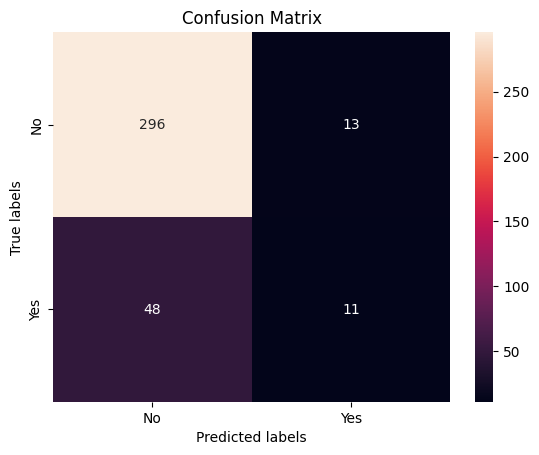

In [ ]:
# Gaussian Naive Bayes with Feature Selection

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

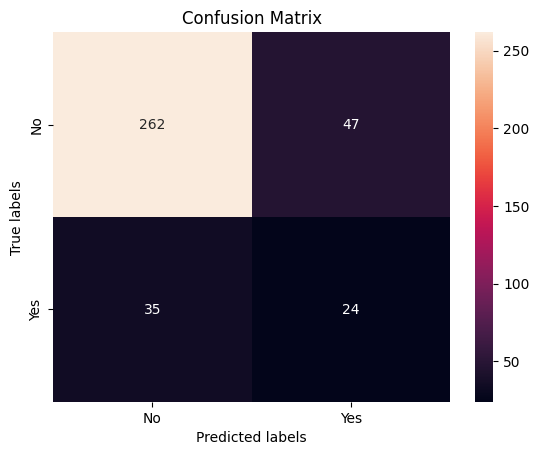

In [ ]:
# Neual Network with Feature Selection

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, mlp_f), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

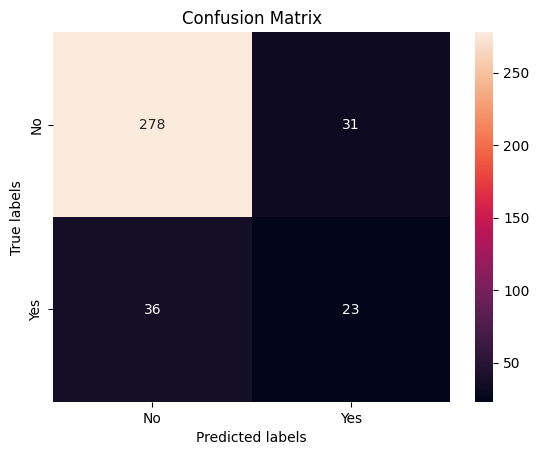

In [ ]:
# Neural Network without Feature Selection

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, mlp), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

 # Model Evalulation
 We test the predictive power of our three classification models by comparing their accuracy, precision, recall, and F1 score.

In [ ]:
# Gaussian Naive Bayes
accuracy_GNB = accuracy_score(y_test, y_pred)
precision_GNB = precision_score(y_test, y_pred)
recall_GNB = recall_score(y_test, y_pred)
f1_GNB = f1_score(y_test, y_pred)

# MLP with feature selection
accuracy_MLPF = accuracy_score(y_test, mlp_f)
precision_MLPF = precision_score(y_test,  mlp_f)
recall_MLPF = recall_score(y_test,  mlp_f)
f1_MLPF = f1_score(y_test,  mlp_f)

# MLP without feature selection
accuracy_MLP = accuracy_score(y_test,  mlp)
precision_MLP = precision_score(y_test, mlp)
recall_MLP = recall_score(y_test, mlp)
f1_MLP = f1_score(y_test, mlp)

In [ ]:
results = {"Metrics": ["Accuracy", "Precision", "Recall", "F1 Score"], "Gaussian Naive Bayes with Feature Selection": [accuracy_GNB, precision_GNB, recall_GNB, f1_GNB], "MultiLayer Perceptron with Feature Selection": [accuracy_MLPF, precision_MLPF, recall_MLPF, f1_MLPF], "Multilayer Perceptron without Feature Selection": [accuracy_MLP, precision_MLP, recall_MLP, f1_MLP]}
summary = pd.DataFrame.from_dict(results)
summary.set_index("Metrics", inplace = True)
summary

,Gaussian Naive Bayes with Feature Selection,MultiLayer Perceptron with Feature Selection,Multilayer Perceptron without Feature Selection
Metrics,,,
Accuracy,0.834239,0.777174,0.817935
Precision,0.458333,0.338028,0.425926
Recall,0.186441,0.406780,0.389831
F1 Score,0.265060,0.369231,0.407080


## Interpretation
- The Gaussian Naive Bayes model with feature selection had the highest accuracy and precision.
- The Multilayer perceptron with feature selection had the highest recall. 
- The Multilayer Perceptron without feature selection had the highest F1 score.